<center><img src="https://media.itsnicethat.com/original_images/563b992b7fa44cff9d001763.gif"></center>
<center><h1>The price of a good Airbnb experience 💰</h1></center>

In [71]:
!pip install chart-studio

**Libraries**

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import os

from IPython.display import HTML


import matplotlib.pyplot as plt
import seaborn as sns

# Now it comes the part where we plot out plotly United States map
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import regex 

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import reciprocal
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
#-------------------------------------------------------------------------------


# importa objetos de keras
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.metrics import RootMeanSquaredError

# optimizador
from tensorflow.keras.optimizers import Adam

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["image.cmap"] = "viridis"

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# 📑 Business Context

Airbnb is a somewhat recent company that offers vacation rental services. Additionally, it offers coverage of 193 countries with more than 2 million properties and is perhaps the most popular and used. It is a safe application, at least I speak from my experience, yes, I have used it too. Of all the times I have used it I have only had one bad experience and that was in New York (the room I rented was not at all the one in the pictures on the app). But well, this motivated me to dig a little deeper with this data and find out what are those things that we should all look at before renting an Airbnb and guarantee a good experience.


On the other hand, we **will also study the relationship that the price has with some of the variables we have available**, such as the neighborhood, the number of rooms, people's reviews, among others. We will try to **predict the price** of each Airbnb according to its characteristics. In this way we will try to avoid the risk of the host setting prices too high or too low and thus increase the probability of acquiring more customers.


## **Goals**


* Predict the price of each Airbnb offered by hosts and in this way try to help them to have more listings by decreasing the risk of charging the wrong price.

* Delivering inputs for hosts with low earnings and making their listings more profitable and earning more revenue.

* Investigate the influence of some variables on the price of each Airbnb.


# 🔍 Data Exploration (EDA)

**Load the Datasets**

We are going to use the Airbnb data from to locations: Seatle and Boston

In [74]:
calendar_boston = pd.read_csv("../input/boston/calendar.csv")
listings_boston = pd.read_csv("../input/boston/listings.csv")
reviews_boston = pd.read_csv("../input/boston/reviews.csv")

#---------------------Data from Airbn Seatle

calendar_seatle = pd.read_csv("../input/seattle/calendar.csv")
listings_seatle = pd.read_csv("../input/seattle/listings.csv")
reviews_seatle = pd.read_csv("../input/seattle/reviews.csv")

In [75]:
###Dimension of datasets
#------------------------Calendar

print("Dimension df for Calendar for Boston:", calendar_boston.shape)
print("Dimension df for Calendar for Seatle:", calendar_seatle.shape)
#-------------------------Listings

print("Dimension df for Listings for Boston:", listings_boston.shape)
print("Dimension df for Listings for Seatle:", listings_seatle.shape)


#---------------------------reviews

print("Dimension df for Reviews for Boston:", calendar_boston.shape)
print("Dimension df for Reviews for Seatle:", calendar_seatle.shape)

From the results above we can noticed that we have more data in Boston datasets. For the other hand, we have more variables in the Boston Listings Dataset than Seatle, we will check this result deeper and get insights. Now let's join the datasets.

In calendar's daframes we have information about dates and price of specific airbnb (listing_id). For both datasets we have a lot of null values in price variable!

In [76]:
columns_lb= listings_boston.columns
columns_ls = listings_seatle.columns

aux = []

for column in columns_lb:
    if column not in columns_ls:
        aux.append(column)

print("We don't have this information in Seatle data:",aux)

#We drop this variables.

listings_boston.drop(aux, axis=1,inplace=True)

In [77]:
def plot_null_values(df, ss):
    '''
    Input: Dataframe
    Output: Plot for the percentage of null values in dataset
    '''
    df_aux = df.isnull().sum()/df.shape[0]
    df_aux.plot(kind='barh')
    plt.title("%Null values in: "+ ss)
    plt.ylabel("Variable")
    plt.xlabel("% of null values")
    #plt.savefig("/images/"+ss+'.png')
    plt.show()

    
boston_dfs = { "Calendar Boston": calendar_boston, 
              "Reviews Boston": reviews_boston}

seatle_dfs = { "Calendar Seatle": calendar_seatle,
              "Reviews Seatle": reviews_seatle}

for name, df in boston_dfs.items():
     plot_null_values(df, name)
        
for name, df in seatle_dfs.items():
     plot_null_values(df, name)

In [238]:
### Join the datasets

calendar_boston['city'] = "Boston"
calendar_seatle["city"] = "Seatle"
calendar = pd.concat([calendar_boston, calendar_seatle], axis=0)
print("Calendar listings unique values.", calendar.drop_duplicates("listing_id").shape[0]/calendar.shape[0])


listings_boston["city"] = "Boston"
listings_seatle["city"] = "Seatle"
listings = pd.concat([listings_boston, listings_seatle], axis=0)
print("Listings unique values.", listings.drop_duplicates("id").shape[0]/listings.shape[0])

reviews_boston["city"] = "Boston"
reviews_seatle["city"] = "Seatle"

reviews = pd.concat([reviews_boston, reviews_seatle],axis=0)
print("Reviews unique values:", reviews.drop_duplicates("listing_id").shape[0]/ reviews.shape[0])

We have 3 datasets and we can infer that the calendar dataset contains information about the reservation of each available Airbnbn (7403). Listings dataset has a specific description of each Airbnb, so we have information about the neighborhood, scores, price, number of bedrooms, and others. **I believe the Calendar dataset is not very useful**.

## **We start the explorarion of the Listings dataset:**

In this Notebook we are going to use only Listings Datasets, but in future works like a recommendation machine I will also use Reviews dataset. So, this dataset has 30 numerical variables:

In [239]:
#cleaning price variable.

listings.price = listings.price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x))

listings.extra_people = listings.extra_people.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x))

listings.cleaning_fee = listings.cleaning_fee.fillna("$0")

listings.cleaning_fee = listings.cleaning_fee.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x))

listings.weekly_price   = listings.weekly_price.fillna("$0")

listings.weekly_price   = listings.weekly_price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x))

listings.monthly_price    = listings.monthly_price.fillna("$0")

listings.monthly_price  = listings.monthly_price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x))

listings.security_deposit    = listings.security_deposit.fillna("$0")

listings.security_deposit   = listings.security_deposit.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x))


dates = ["calendar_last_scraped", "last_scraped", "host_since"]
for col_date in dates:
    
    listings[col_date] = pd.to_datetime(listings[col_date]) #good format for date variable

listings.reset_index(drop=True, inplace=True)

In [85]:
listings.describe().iloc[:,20:30]

The Id type variables we will not employ in our Airbnb price prediction model as they have high cardinality. On the other hand, it seems that the host_listings_counts and host_total_listings_count variables are highly correlated.

* On average each Airbnb has availability of 3 persons, 1 bedroom, and 1 bathroom.

* The first glance at the price is that on average per night you have $\$$150, $ \$$325 per week and $\$$978 per month. Additionally, we have properties up to
 $\$$4000  per night.

* Some extra expenses are: insurance deposit $\$$131, cleaning fee $\$$ 46.12

* Other features: average guests 1, minimum number of nights: 2.75, number of reviews 29.7 and number of reviews per month 2.02.

**¿How about null values?**

In [110]:
f, axs = plt.subplots(2, 2, sharey=True)

sns.set(rc={'figure.figsize':(25,35)})
sns.heatmap(listings.iloc[:, 0:25].isnull(), cbar=False, ax=axs[0,0])
sns.heatmap(listings.iloc[:, 25:50].isnull(), cbar=False, ax= axs[0,1])
sns.heatmap(listings.iloc[:, 50:75].isnull(), cbar=False, ax= axs[1,0])
sns.heatmap(listings.iloc[:, 75:95].isnull(), cbar=False, ax= axs[1,1])

We are going to delete unuseful features, with a high percentage of null values, with a lot of same values and features with high cardinality.

In [240]:
dic_null_values = {}

for col in listings.columns:
    pcte = listings[col].isnull().sum()/listings.shape[0]
    dic_null_values[col] = pcte

cols_drop= []

for col, pcte in dic_null_values.items():
    if pcte > 0.7:
        cols_drop.append(col)
        

listings.drop(cols_drop, axis=1, inplace=True)


# Detecting cardinality and features with a lot of same values

#We have that the following features have a big variance: id, scrape_id, hot_id. So we will drop it.

listings.drop(["id", "scrape_id", "host_id"],axis=1, inplace=True)


print("New dimension of our dataset:", listings.shape)

In [235]:
###Using the methods of sklearn for preprocessing data

sel = VarianceThreshold(threshold=0.01)
sel.fit(listings.select_dtypes(exclude=["object", "datetime64"])) 

# alternate way of finding non-constant features
print("number of non-constant features:",len(listings.select_dtypes(exclude=["object", "datetime"]).columns[sel.get_support()]))

In [113]:
price = listings['price'].values.tolist()
boston_price = listings['price'].loc[listings['city'] == 'Boston'].values.tolist()
seatle_price = listings['price'].loc[listings['city'] == 'Seatle'].values.tolist()

trace0 = go.Histogram(
    x=boston_price,
    histnorm='probability',
    name="Boston Prices",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x= seatle_price,
    histnorm='probability',
    name="Seatle prices",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=price,
    histnorm='probability',
    name="Prices distribution",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Boston','Seatle', 'Two cities'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Prices of Airbnbs', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

print("Null values:", listings.price.isnull().sum())


For this variable we have no missing values. On the other hand, it can be observed that we have quite skewed distributions, where the values of the prices vary up to $\$$ 4000 in de Boston and $\$$ 1000 in Seatle.

In [114]:
fig = px.box(listings, x="city", y="price", color= 'accommodates')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

It seems that we have outliers in Boston. Now check features related with reviews scores.

In [116]:
#f, axs = plt.subplots(8, 1)
sns.displot(listings, x="number_of_reviews", hue="city", kind="kde", height=5, aspect=3, ax= axs[0])
plt.title("Distribution of Number reviews ", fontsize=16);
print("null  of  numbers scores:", listings.number_of_reviews.isnull().sum())

sns.displot(listings, x="review_scores_accuracy", hue="city", kind="kde", height=5, aspect=3, ax= axs[1])
plt.title("Distribution of  score Accuracy review ", fontsize=16);
print("null  of  score reviews:", listings.review_scores_accuracy.isnull().sum())

sns.displot(listings, x="review_scores_rating", hue="city", kind="kde", height=5, aspect=3, ax= axs[2])
plt.title("Distribution of  score ratting ", fontsize=16);
print("null  of  score rating reviews:", listings.review_scores_rating.isnull().sum())

sns.displot(listings, x="review_scores_cleanliness", hue="city", kind="kde", height=5, aspect=3, ax= axs[3])
plt.title("Distribution of  score Cleanliness review ", fontsize=16);
print("null  of  score cleanlinnes reviews:", listings.review_scores_cleanliness.isnull().sum())

sns.displot(listings, x="review_scores_checkin", hue="city", kind="kde", height=5, aspect=3, ax= axs[4])
plt.title("Distribution of  score Checking review ", fontsize=16);
print("null  of  score checkin reviews:", listings.review_scores_checkin.isnull().sum())

sns.displot(listings, x="review_scores_communication", hue="city", kind="kde", height=5, aspect=3, ax= axs[5])
plt.title("Distribution of  score Communication review ", fontsize=16);
print("null  of  score communication reviews:", listings.review_scores_communication.isnull().sum())


sns.displot(listings, x="review_scores_location", hue="city", kind="kde", height=5, aspect=3, ax= axs[6])
plt.title("Distribution of  score Location review ", fontsize=16);
print("null  of  score location reviews:", listings.review_scores_location.isnull().sum())


sns.displot(listings, x="review_scores_value", hue="city", kind="kde", height=5, aspect=3, ax= axs[7])
plt.title("Distribution of  Value score review ", fontsize=16);
print("null  of  score value reviews:", listings.review_scores_value.isnull().sum())

* We have found that some of the variables related to the score have practically equal distributions, we should study this further and eliminate some of these variables. 

**Exploring correlation values**

In [117]:
f = plt.figure(figsize= (15,15))
sns.set_context("paper", font_scale=1.)
sns.heatmap(listings.corr(),  annot=True,  linewidths=.3, fmt= '.1f')
plt.title("Corration values for feaures"); 

**We have a lot of featurues with high correlation value, so I will drop some features with correlation value > 0.7**

In [241]:
corr_matrix = listings.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

print(high_corr_var)

drop_corr_var = []
for num in enumerate(high_corr_var):
   drop_corr_var.append(num[1][1])

drop_corr_var.remove("longitude")
drop_corr_var.append("neighbourhood")

listings.drop(drop_corr_var, axis=1, inplace=True)
print("        ")
print("The new shape of listings dataset is:", listings.shape)

In [124]:
 px.violin(listings, y="price", x="property_type", color="city", box=True, title="Price and type of Airbnb")

In [119]:
neighbourhood_cities= listings.groupby(["city", "neighbourhood_cleansed"]).agg({"listing_url":"count"}).rename(columns={"listing_url":"count"}).reset_index()
fig = px.bar(neighbourhood_cities, x="neighbourhood_cleansed", y="count", color="city", title="Number of Airbnb per neighbourhood in each city")
fig.show()

* The neighbourhood with most and lest Airbnb in Boston is: Jamaica Plain and Leather district

* The neighbourhood with most and lest Airbnb in Seatle is: Broadway and Roxhill


**What about price in each neighbourhood?**

In [120]:
fig = px.strip(listings, y="price", x="neighbourhood_cleansed", color="city", 
           title="Price distribution per neighbourhood")

fig.show()

* The most expensives Airbnbs in Boston are in Downtwon and South Boston Waterfront.

## **The Map and Review Score for each Airbnb**

Below we can see the exact location of each of the properties, examine the neighborhood, what amenities the neighborhood has, transportation facilities, and most importantly the review score. This visualization will be of great help to make decisions to rent or not to rent an Airbnb according to the needs of each person.

In [125]:
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color='review_scores_rating', zoom=3, mapbox_style='open-street-map')
fig.show()

In [121]:
sns.set_context("paper", font_scale=3)
sns.displot(data=listings, x="price", hue="room_type", linewidth = 4.5,row="city", kind="kde", height=10, aspect=3.5 )
plt.title("Price distribution for room type city: Seatle", fontsize=30);

In [200]:
#f, axs = plt.subplots(2, 1)
sns.set_context("paper", font_scale=3)
sns.displot(data=listings, x="price", hue="bed_type", row="city", linewidth = 5.5, kind="kde", height=10, aspect=3.5, ax= axs[0] )
plt.title("Price distribution for bed type: Seatle", fontsize=30);

sns.set_context("paper", font_scale=3)
sns.displot(data=listings[listings.bed_type!="Real Bed"], x="price", linewidth = 5.5,hue="bed_type", row="city", kind="kde", height=10, aspect=3.5, ax=axs[1] )
plt.title("Price distribution for bed type: Seatle", fontsize=30);

In [122]:
f = plt.figure(figsize= (15,5))
sns.set_context("paper", font_scale=1.5)
sns.heatmap(listings.query('price <= 4000')\
                .groupby(['bathrooms', 'accommodates'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'accommodates', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5,)

**Some insights for bad host with low listings values**

In [268]:
listings["weighted_score"] =  (listings['reviews_per_month'] * listings['review_scores_rating']) / 10

listings["weighted_score"].fillna(0, inplace=True)

How to choose the threshoold for low Listings?

In [221]:
fig = px.box(listings, y="weighted_score")
fig.show()

Ok we can choose the thresholds for each group with the quantile values, the good listings group has high values.

In [280]:
top90flag = listings["weighted_score"].quantile(0.9)
upto25flag = listings["weighted_score"].quantile(0.25)

listings['top90'] = listings["weighted_score"] >= top90flag
listings['upto25'] = listings["weighted_score"]<= upto25flag

print('The boundaries of top performer listings:',top90flag)
print('The boundaries of low performer listings:',upto25flag)

In [227]:
def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value


def gen_xaxis(title):
    """
    Creates the X Axis layout and title
    """
    xaxis = dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return xaxis


def gen_yaxis(title):
    """
    Creates the Y Axis layout and title
    """
    yaxis=dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return yaxis


def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                    )



def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars


def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations


def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot, 'color', orient=orient), layout=layout)
    return iplot(fig)

In [230]:

listings['score_ranges'] = listings["weighted_score"].apply(rangeScore)

# table coloring purpose.
top90 = listings.groupby('score_ranges', as_index = False)['top90'].max().rename(columns={'score_ranges':'Score'})
upto25 = listings.groupby('score_ranges', as_index = False)['upto25'].max( ).rename(columns={'score_ranges':'Score'})

# count distributions of score bins.
barplot = listings[['id',"weighted_score"]]
barplot['Qty'] = barplot["weighted_score"].apply(rangeScore)
barplot = barplot.Qty.value_counts(sort=True).to_frame().reset_index()
barplot = barplot.rename(columns={'index': 'Score'})

# merging color flag.
barplot = barplot.merge(top90, on = 'Score')
barplot = barplot.merge(upto25)
# creating color for the vis.
barplot['color'] = barplot.top90.apply(lambda x: 'mediumaquamarine' if x else 'lightgray')
# manually change the color of the first index become crimson, to indicate the class of low performer listings.
barplot.iloc[0,4] = 'crimson'

# change Score column and Qty column into x and y for the vis purpose.
barplot = barplot.rename(columns={'Score':'x','Qty':'y'})

# Some of the annotations for the vis.
title_text = ['<b>Comparison Listings Performance between Top and Low</b>', 'Reviews per Month x Review Score Ratings / 10', 'Quantity of Listings']
annotations = [{'x': 0.03, 'y': 4000, 'text': 'Low Performer Had Score Up to 25 Percentile','color': 'gray'},
              {'x': 0.39, 'y': 300, 'text': 'Top Performer Had Score above 90 Percentile','color': 'mediumaquamarine'}]

generate_barplot(title_text, annotations)

In [260]:
no_useful_feat = ["listing_url","name", "summary", "space", "description", "experiences_offered", 
                "neighborhood_overview", "notes", "transit", "thumbnail_url", "medium_url", "picture_url",
                 "xl_picture_url", "host_url", "host_name", "host_location", "host_about",
                 "host_thumbnail_url", "host_picture_url", "host_neighbourhood",
                  "street","neighbourhood_group_cleansed", "city", "state","first_review", "last_review",
                  "zipcode", "market", "smart_location", "country_code", "country", "latitude", "longitude",
                 "amenities", "has_availability", "availability_30", "availability_365",
                  "requires_license", "jurisdiction_names"]

listings.drop(no_useful_feat, axis=1, inplace=True)

In [272]:
var = ["number_of_reviews",     
        "review_scores_accuracy",   
        "review_scores_checkin", 
        "review_scores_rating","review_scores_communication", "review_scores_location"]

listings.drop(var, axis=1,inplace=True)

In [273]:
corr = listings.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [276]:
aux= listings.corr().unstack().sort_values(ascending=False)
print('The correlation of the new_score_reviews against all:', aux['weighted_score'][1:10])

**We are going to examinate the most importans features**

In [284]:
def groups(x,y):
    if x==True:
        return "Top Scores"
    if y==True:
        return "Worst Scores"
    
listings["group"] = listings.apply(lambda x: groups(x["top90"], x["upto25"]) ,axis=1)

In [288]:
sns.set_context("paper", font_scale=3.4)
sns.displot(data=listings, x="host_acceptance_rate", hue="group", linewidth = 5.5, kind="kde", height=10, aspect=3.5, ax= axs[0] )
plt.title("Host acceptance rate distribution", fontsize=30)

sns.displot(data=listings, x="host_response_rate", hue="group", linewidth = 5.5, kind="kde", height=10, aspect=3.5, ax= axs[0] )
plt.title("Host response rate distribution", fontsize=30);


**It is clear that in order to improve, the response rate must be improved for hosts**

In [460]:
table_insights = listings.drop(["guests_included","maximum_nights", "host_has_profile_pic","weighted_score","top90","upto25","age_host","host_is_superhost", "host_identity_verified", "is_location_exact", "instant_bookable",
              "require_guest_profile_picture", "require_guest_phone_verification","host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_listings_count", "accommodates", "bathrooms", "price", "weekly_price", "monthly_price"], axis=1).groupby("group").mean()

table_insights

In [457]:
for var in table_insights.columns:
    
    if table_insights[var][0] > table_insights[var][1]:
    
        table_insights[var] = np.abs((table_insights[var][0]-table_insights[var][1])/table_insights[var].max())
    else:
        
        table_insights.drop(var, axis=1, inplace=True)
    

for var in table_insights.columns:
     
     if table_insights[var][0]  >= 0.25:
            table_insights[var]= table_insights[var]
     else:
            table_insights.drop(var, axis=1, inplace=True)

In [458]:
table_insights = table_insights.reset_index().drop("group",axis=1).iloc[:1,:]
table_insights.stack()

##  Suggestions for Hosts



* In the first view of the insights table we see that the worst scores are for hosts that have a very high deposit and cleaning fee. It is therefore recommended to adjust these prices.

* On the other hand, we can also see that the minimum number of nights is approximately double for those hosts with high scores. It is recommended to review this restriction.

* The list above shows those variables that the host should check. For example, they could offer shampoo, be pet friendly, offer breakfast, have checking in for 24 hrs.

*  The last variables are related to host verification so it is recommended that you please certify your account through the Airbnb app.

**Removing Outliers**

In [237]:
def z_score(df,var, threshold =3):
    
    '''Function for remove outliers with the definition of z score value
    Input: dataframe, variable and you can modify the threshold
    Out: Dataframe without outliers'''
    
    z = np.abs(stats.zscore(df[var]))
    df["zscore"] = z
    df = df[(df.zscore>-  threshold) & (df.zscore< threshold)]
    df.drop("zscore", axis=1, inplace=True)
    
    return df

listings_copy = listings.copy()
listings = z_score(listings, "price")

print("Number of outliers:", listings_copy.shape[0]-listings.shape[0])

# 🔄 Feature Engineering and Selection

In [242]:
#We are going to create variables from dates variables:
#this columns seems very unusefull:
print(listings.last_scraped.value_counts())
listings["age_host"] = (listings['calendar_last_scraped'] -listings['host_since']).dt.days
listings.drop(dates, axis=1,inplace=True)
listings = listings[(listings.property_type.notna()) & (listings.age_host.notna())]

**Imputation**

In [249]:
# Prepare the Imputation Objects


listings["host_response_rate"]  = listings["host_response_rate"].replace('[%]', '', regex=True).apply(lambda x: float(x))
listings["host_acceptance_rate"]  = listings["host_acceptance_rate"].replace('[%]', '', regex=True).apply(lambda x: float(x))


median_impute = SimpleImputer(strategy = 'median')
mode_impute = SimpleImputer(strategy = 'most_frequent')
mean_impute = SimpleImputer(strategy = 'mean')

def apply_imputation(impute_object, column):
    
    '''Function that applies the imputation to the desired column.
    Returns the values for train and test.'''

    imputed = impute_object.fit_transform(X = listings[[column]])
    
    return imputed


listings["bathrooms"]  = apply_imputation(mean_impute,"bathrooms")  
#listings["beds"]  = apply_imputation(mean_impute,"beds")  
#listings["bedrooms"]  = apply_imputation(mean_impute,"bedrooms")  
listings["reviews_per_month"]   = apply_imputation(mean_impute,"reviews_per_month")

var_reviews = ["review_scores_rating","review_scores_accuracy","review_scores_checkin",
              "review_scores_location", "review_scores_communication",
              "host_response_time","host_response_rate","host_acceptance_rate" ]

for rev in var_reviews:
    
        listings[rev]   = listings[rev].fillna(0)
        
        
categorical_aux =  [ "has_availability", "host_has_profile_pic", "host_identity_verified",
                    "is_location_exact", "host_is_superhost", "require_guest_profile_picture",
                   "require_guest_phone_verification", "instant_bookable", ]

for cat in categorical_aux:
    
    listings[cat]= listings[cat].apply(lambda x: 0 if x=="f" else 1)




## **Feature Selection**

In this section, we will discuss two methods for variable selection. On the other hand, we will select variables according to their type, i.e. the first method will be applied to continuous variables and the second will be applied to categorical variables. The methods are:

* Mutual information score
* Lasso Regression

**Mutual Information**

To understand this concept, first, we should understand what is entropy and why is so useful for feature selection. The entropy of a random variable is a function which attempts to characterize the “unpredictability” of a random variable, in other words, is the amount of information that we need to predict the state of the system of, in this case, random variable.

$$H(X) = -\sum_{x\in X} P(x)\log(P(x)) $$


With this concept now we can define the mutual information.

Mutual information is a quantity that measures a relationship between two
random variables that are sampled simultaneously. In particular, **it measures
how much information is communicated, on average, in one random variable
about another**. Intuitively, one might ask, how much does one random variable
tell me about another? So the mutual information between two variables is 0 if and only if the two variables **are statistically independent**. The formal definition is:

$$I(X;Y) = \sum_{x\in X}\sum_{y\in Y} P(x,y) \log(\frac{P(x,y)}{P(x)P(y)})$$

In this definition, P(X) and P(Y ) are the marginal distributions of X and
Y. For the other hand we can rewrite the above equation in terms of entropy and joint entropy:

$$I(X;Y) = H(X) + H(Y)- H(X|Y)$$

Note: If X and Y are independent we have:  $H(X|Y)=0$

In [190]:
X =  listings.drop("price", axis=1)
y = listings[["price"]]

X = X.select_dtypes(exclude= ["object", "datetime"])
#We eliminate variables that are not very useful for prediction 
#or those that have information about our target variable such as: "security_deposit", "monthly_price", "weekly_price", 
X = X.drop(["security_deposit", "monthly_price", "weekly_price", "latitude", "longitude", "availability_30", "availability_365"],axis=1)

In [191]:
 #-----------------Now we explore feature selecction with mutual information score.

def calc_MI(x, y):
    
    scores = []
    for col in x.columns:
        r = np.corrcoef(X["maximum_nights"].values, y.values.flatten())[0,1]
        bins = int(np.round((1/np.sqrt(2))*pow(1+np.sqrt( 1+ (24*X.shape[0])/(1-r*r)), 0.5)))
        c_xy = np.histogram2d(x[col].values, y.values.flatten(), bins=bins)[0]
        mi = mutual_info_score(None, None, contingency=c_xy)
        scores.append(mi)
        
    mi_scores = pd.Series(scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return  mi_scores

####How select the number of bins?

mi_scores = calc_MI(X, y)
print("-----------------------------------------")
print("Mutual information scores:")
print( mi_scores[::3])  # show a few features with their MI scores

#Now we are going to estimate the best number of features 



In [192]:
#Recursive feature elimination
n_splits = 10
to_try = X 

mean_drop_scores = []
std_drop_scores = []

for feat in  mi_scores.sort_values().index[0:-1]: # we strat to drop the less importarnt features
    
    to_try = to_try.drop(str(feat), axis=1)
    X_ = to_try.values
    y_ = y.values
    
    rf = RandomForestRegressor() #baseline model
    stk = StratifiedKFold(n_splits=n_splits, random_state=0)
    scores = []
    for train_idx, test_idx in stk.split(X_, y_):
        x_train, x_test = X_[train_idx], X_[test_idx]
        y_train, y_test = y_[train_idx], y_[test_idx]
        
        rf.fit(x_train, y_train)
        proba = rf.predict(x_test)
        scores.append(mean_squared_error(y_test.flatten(), proba))
    
        
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    mean_drop_scores.append(mean_score)
    std_drop_scores.append(std_score)

In [193]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, mi_scores.shape[0]-1), mean_drop_scores, 'o-', color="red")
plt.fill_between(np.arange(0, mi_scores.shape[0]-1),
                 mean_drop_scores-np.array(std_drop_scores),
                 mean_drop_scores+np.array(std_drop_scores), color="tomato", alpha=0.2)

plt.title("Scores per number of features used in the baseline model")
plt.ylabel("MSE")

In [ ]:
var_noimportant = list(mi_scores.index[11:])
print(var_noimportant)
var_noimportant = var_noimportant+["security_deposit", "monthly_price", "weekly_price", "latitude", "longitude", "availability_30", "availability_365"]

From the figure above we can see that the error increases as the number of variables to train the model increases. The inflection point can be seen at point **20**. Meaning that the first **20** features in the mi_scores list will be used to do the final model. We are going to create new variables from the following two:  host_verification, ameneties. To do this we must extract the information and vectorize it.

**Create Amenities Columns**

In [243]:

listings['amenities'] = listings['amenities'].map( lambda vars: ",".join([var.replace("}", "").replace("{", "").replace('"', "")\
                           for var in vars.split(",")]))

listings['host_verifications'] = listings['host_verifications'].map( lambda vars: ",".join([var.replace("[", "").replace("]", "").replace("'", "")\
 
                                                                                            for var in vars.split(",")]))
#------------------------------------------------------------------------------------------------------------------------------------------------------
cols_amenities = np.concatenate(listings['amenities'].map(lambda amns: amns.split(",")).values)

cols_host_verifications = np.concatenate(listings['host_verifications'].map(lambda amns: amns.split(",")).values)


for col in cols_amenities:
    listings[col] = 0
    
for col in cols_host_verifications:
    listings[col] = 0
    
    
for col in cols_amenities:
    
    listings[col] = listings["amenities"].apply(lambda x: 1 if col in x else 0) 
    
for col in cols_host_verifications:
    
    listings[col] = listings["host_verifications"].apply(lambda x: 1 if col in x else 0) 

In [ ]:
drop_var = ["calendar_updated", "neighbourhood_group_cleansed","listing_url", "experiences_offered", "thumbnail_url", "medium_url", "picture_url", 
            "xl_picture_url", "host_url", "host_name", "host_location", 
            "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_verifications", "street",
           "state", "zipcode", "market", "smart_location", "country_code", "country", "latitude", "longitude",
           "amenities", "first_review", "last_review",  "availability_30", "availability_365"]


drop_var = drop_var + var_noimportant
listings.drop(drop_var, axis=1, inplace=True)

print("New dimension of Dataframe:", listings.shape)

Since we are going to employ a regression model to predict the price of Airbnb places, using a neural network, we need to scale the data to get the right results. Next we will perform all the data processing to make the model.

**Categorical data Selection**

**Lasso Regression for a simple variable selection**

For define Lasso Regression, first we should do a brief introducction to OLS (Ordinary least squares linear regression (OLS)). This is defined as the minimization of the L2 norm of the difference between the response $y_i$ and the predictor $f(x^{(i)}; w) =w^Tx^{(i)}$:


$$\hat{w}_{LS} = \arg\min||\vec{X}\vec{w}- y||^2$$

One of the most interesting results is te following:




$$\bar{E}_{in} = \sigma^2(1-\frac{p}{n})$$
$$\bar{E}_{out} = \sigma^2(1-\frac{p}{n})$$ 
$$ \bar{E}_{in} - \bar{E}_{out} = 2 * \sigma^2\frac{p}{n} $$

Where $p$ is the number of predictors and $n$ is the number of points in sample data.
This imparts an important message: if we have $p\gg n$ (high-dimensional data), the generalization error is extremely large, meaning the model is not learning. Even
when we have $p$ ≈ $n$, we might still not learn well due
to the intrinsic noise $\sigma^2$. One way to ameliorate this is, as we shall see in the following  to use regularization, in this case Lasso Regularization  or L1.

In general, LASSO tends to give sparse solutions, meaning many components of $\hat{w}$ 
are zero. An intuitive justification for this result is provided in the next figure:


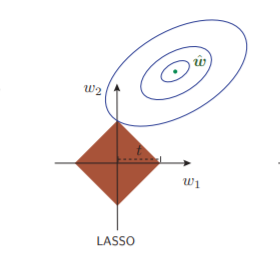

To solve a constrained optimization problem with a fixed regularization strength
t ≥ 0,  one first carves out the “feasible region" specified by the regularizer in the
$\{w_1, · · · , w_d\}$ space. This means that a solution $\hat{w}$ is legitimate only if it falls in this region. So in the Figure, the blue concentric ovals are the contours of the regression function while the red shaded regions represent the constraint function: |w1| + |w2| ≤ t and. Intuitively, since the constraint function of LASSO has more
protrusions (vertices), the ovals tend to intersect the constraint at the
vertex. Since the vertices correspond to
parameter vectors $w$ with only one non-vanishing component,
LASSO tends to give sparse solution.

In [142]:
var_cat = ["has_availability", "instant_bookable"]
var_cat_1 = list(listings.iloc[:,17:].columns)
var_cat_ = var_cat + var_cat_1

for var in var_cat_:
    
  listings[var] = listings[var].astype("category") 

print("We have {} categorical features".format(listings.select_dtypes(include="category").shape[1]))

cat_df = listings.select_dtypes(include="category")

#label_encoder = LabelEncoder()

#for var in cat_df.columns:
#    cat_df[var]= label_encoder.fit_transform(cat_df[var])

cat_df["price"] = listings["price"]

def train_test_split_scaled(df, target):

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(
                                                    df.drop(labels=[target], axis=1),
                                                    df[target],
                                                    test_size=0.3,
                                                    random_state=0)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return  X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scaled(cat_df, "price")

sel_ = SelectFromModel(Lasso(alpha=1))
sel_.fit(X_train, y_train)

lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print("The rmse score for this simple model and all categorical features is:", np.sqrt(mean_squared_error(y_test, y_pred)))

selected_feat = cat_df.drop("price", axis=1).columns[(sel_.get_support())]

print("------------------------------------------------------")


print("------------------------------------------------------")


print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

removed_feats = cat_df.drop("price", axis=1).columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]


listings = listings.drop(removed_feats, axis=1)
print("------------------------------------------------------")



print("------------------------------------------------------")




# The Model: Predicting  price of Airbnb with Artificial Neural Network


**What is Neural Networt?**

The Neural Nets are inspired on biological neural connections. As we will see neural nets can be viewed as an extension of supervised  learning models like Logistic regression. Essentially, neural nets are very powerful general-purpose function approximators that can be trained using many examples. For example:

$$y = F_\theta(x)$$

For a neural net the above equation becomes:

$$y = F(x)$$ 

Where F(x) is a smooth function. So the goal here will be to approximate $F(x)$ as well as possible  by choosing the right parameter in $F_\theta$.

For a Neural Network problem we need to construct the representation of $F_\theta$ with two conditions:

* Scalable
* Efficient

**The layer of NN**

Neuron is the basic unit of ANN (artificial neural network), wich holds a scalar value (real number). The operation of this neuron is quite simply:  

* As in the Figure (1) we can see that each neuron takes an input (a linear combinarion of $n$ vectors)

$$z = \sum_i w_i*y_i +b_i$$


* Aftherwards a non-linear function $f$ is applied to get the output value of each neuron **(b)** in figure(1).
$$y = f(z)$$

* To obtain a non-linear function $F_\theta$ that can truly represent arbitrary functions $F(x)$, multiple layers of neurons are needed. Each neuron receives the values of all the neurons of the precending layers. For the multi-layer case we have:

$$z_j^{(n+1)}= \sum_k w_{k,j}^{(n+1)}* y_k^n + b_j^{(n+1)}$$
$$ y_j^{(n+1)}= f(z_j^{(n+1)})$$


The computational effort and memory consumption scales quadratically of the typical number of neurons ( $N^{(n+1)}* N^n$).

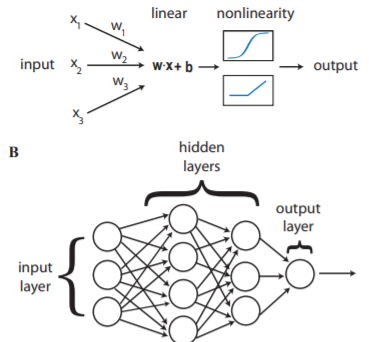

Figure (1). General description of Neural Nets.


**How to train a Neural Net?**

One of the most important questions for train a ANN is: how can we measure the deviation between the real and the estimate function? to do this we will introduce the cost function $C$:

$$ C_x(\theta) = |F_\theta(x)-F(x)|^2$$
$$ C_\theta  =  <C_x(\theta)>_x$$


Once the cost function has been defined, the principal idea is to try finding its minimum by gradient descent in high dimensional space of $\theta$ parameters.

*The problem of gradient descent*

Whenever we use a library, like Keras, to design a neural network we are always unaware of the optimization algorithm underneath. But it is important, so here is my interpretation of this algorithm.

In principle gradient descent is simple. We just move along the negative gradient of the cost function.

$$\delta\theta_k = -\eta\frac{\partial C(\theta)}{\partial \theta_k}$$

The parameter $\eta$ is called the learning rate. If it is too small, learning will proceed slowly, but if it is too large, one may overshoot the optimum. Now we will show you a interest result for $\eta$ very small:

$$ \delta C = -\eta (\frac{\delta C}{\delta \theta})^2 + O(\eta^2)$$ 


But we have two principal problems with the calculation of minimun of cost function:

* The cost function is defined as an average over all possible inputs, wich is much too expensive to calculate at each step.

* The cost function depends on many parameters, and we have to find a way to calculate the gradient efficiently.


The first problem is solved by averaging only over a small number of randomly selected
training samples (called a “batch”, or sometimes more precisely a “mini batch”):

$$ C(\theta) \approx \frac{1}{N}\sum_{j=1}^N C_{x,j}(\theta) \equiv  <C_x(\theta)>_{batch}$$

$$ \delta\theta_k = - \eta <\frac{\partial C(\theta)}{\partial \theta_k }>_{batch} = \frac{\partial C(\theta)}{\partial \theta_k } + noise $$


**Back propagation Algorithm**

We did'nt solve the problem to calculate the gradient in high dimensional space of parameters. The chain rule will be the savior, for example for the quadratic cost function [1]:

$$ \frac{\partial C_x(\theta)}{\partial \theta_k} = 2 \sum_l([F_\theta(x)]_l - [F(x)]_l) \frac{\partial [F_\theta(x)]_l}{\partial \theta_k}$$

With $F_\theta(x) = y$ with this we should to calculate:

$$ \frac{\partial y_l^{(n)}}{\partial \theta_k } = f^*(z_l)\frac{\partial z^{(n)}}{\partial \theta_k}$$

$$ \frac{\partial z^{(n)}}{\partial \theta_k} = \sum_m w_{l,m}^{n,n-1} \frac{\partial y_m^{(n-1)}}{\partial \theta_k}$$

$$ M_{l,m}^{(n, n-1)} = w_{l,m}^{(n, n-1)} f^{*} (z_m^{(n-1)}) $$

**The above equations are telling us: we need to calculate the gradient of each neuron value regarding to all paramters!!**

**Did you see the recursive structure? if the answer is no, please write to me**


# Apply the concepts of ANN!

**Here we are going to predict the prices of different option of Airbnbs, fot this task we are going to create a Neural Net!!**, so we will drop some features unuseful for the prediction.

**Target: Price**

In [ ]:
#We won't use the description variables, so we are going to drop it:

vars_drop = ["neighbourhood","requires_license","jurisdiction_names", "notes","name", "summary", "space", "description", "neighborhood_overview", "transit", "host_about", 
             "host_response_time", ]

#listings.drop(vars_drop, axis=1, inplace=True)

In [141]:
listings = pd.read_csv("../input/preprocess-data-airbnb/pre_procesing_data.csv")
###One hot encoding...


categorical_aux = ["instant_bookable"]

for cat in categorical_aux:
    
    listings[cat]= listings[cat].apply(lambda x: 0 if x=="f" else 1)
    

listings = pd.get_dummies(listings,drop_first=True)
print("Dimesion of dataset:",listings.shape)

**Prepare de data for Neural Net**

In [144]:
#scaling 
X = listings.drop(["price"], axis=1)
y = listings[["price"]]

sc = StandardScaler()


X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.35, random_state=42)

#We also need a validation set for our future ANN

X_test, X_valid, y_test, y_valid = train_test_split(X_test_, y_test_, test_size=0.7, random_state=42)


#Scaler in action!
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

**The model**

In [154]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, dropout=0.15,input_shape=[X_train.shape[1]]):
    
 """" 
      Simple Neural Net for regression task (output is one dimensional)  
      Inputs: n_hidden = Amount of Layers of ANN
              n_neurons = Amount of neurons of each layer
              learning_rate = step for gradient descent algorithm
              dropout = regularization term for avoid overfitting
              input_shape = Number of features 
 """

 model = keras.models.Sequential()
 model.add(keras.layers.InputLayer(input_shape=input_shape))
    
 for layer in range(n_hidden):
    
     print("Layer number:", layer)
     print(n_neurons)
    
     model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    
 model.add(Dropout(dropout))
 model.add(keras.layers.Dense(1))
 optimizer = keras.optimizers.Adam(learning_rate= learning_rate)
 model.compile(loss="mse", optimizer=optimizer,  metrics=[RootMeanSquaredError(name='rmse')])

 return model

**Training and tunning ANN for regression task!**

In [155]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#Set the parameters to build our ANN 

param_distribs = {
 "input_shape": [X_train.shape[1]],
 "n_hidden": [2,3,5,15,25,35,45 ],
 "n_neurons": [3,5, 15,30,45],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)


model_rnd_cv = rnd_search_cv.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=20)], verbose=0)

In [156]:
print("Best parameters =", rnd_search_cv.best_params_)

model = rnd_search_cv.best_estimator_.model


# **📊 Results: Loss for ANN and Predicctions**

In [157]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=15)], verbose=1)



f = plt.figure(figsize= (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title("Loss function for train and validation set")
plt.show()

**From the loss functions we can observe that both the loss in training and in validation are decreasing as the epochs increase. No overfitting is observed (the validation curve starts to increase dramatically almost like a parabola).**

## **Final Predicction in test set**

In [158]:
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE in test:", rmse_test)

#Visualize model prediction
def model_prediction_plot(y_test, pred, name_test, name_pred, Title):
    
    plt.figure(figsize=(10, 8))
    ax1 = sns.distplot(y_test, hist=False, color="r", label=name_test)
    ax2 = sns.distplot(pred, hist=False, color="b", label=name_pred, ax=ax1)
    plt.title(Title)
    plt.xlabel('Price (dollars)')
    plt.legend()
    plt.show()
    plt.close()
model_prediction_plot(y_test, y_pred, 'Actual Values', 'Predicted Values', 
                 'Distribution  Plot of  Predicted Value vs Test Data Distribution')

## What a great job this is a great result considering that the RSME obtained in our first simple model (LASSO) was 62.5 and here it is **51.4**, AMAZING!

In [ ]:
listings.to_csv("./pre_procesing_data.csv", index=False)

# References

[1]. Pankaj Mehta, Ching-Hao Wang, Alexandre G. R. Day, and Clint Richardson, A high-bias, low-variance introduction to Machine Learning for physicists. 2019

[2]. F. Marquardt, Machine Learning and Quantum Devices. 2021.